<a href="https://colab.research.google.com/github/DeepFluxion/F1rst/blob/main/Teste_para_vaga_Cientista_de_Dados_Senior_Parte_1_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requisitos da Parte 1 do Teste
---
### Parte 1: Algoritmos aplicados à base de dados de Fraudes do Kaggle.

Nesta Parte 1A Foi considerado o seguinte Exemplo:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Essa parte consiste na elaboração de um Jupyter Notebook (ou outra ferramenta que lhe for mais conveniente para apresentação) com pelo menos 2 técnicas à sua escolha para resolver uma ou mais competições de Fraude contidas no Kaggle. 

O candidato tem a liberdade para escolha da competição que lhe for mais conveniente, bem como de unir todas as bases de dados caso queira.
**Pacotes obrigatórios para se utilizar:** Pandas, Scikit-learn, Tensorflow (ou PyTorch).

### Comentários:
- Optou-se por uyilizar o Jupyter Notebook utilizando o Google Colab
- Nesta parte 1B o desenvolvimentou focou em técnicas de Aprendizado Profundo para classificação binária, empregando o pacote [TensorFlow 2.0](https://www.tensorflow.org/tutorials?hl=pt-br)
- Também empregou-se a API [Keras](https://www.tensorflow.org/guide/keras/sequential_model?hl=pt-br)
- Para maniputação dos dados foi usado o pacote [Pandas](https://pandas.pydata.org/)
- Outras bibliotecas mais comuns foram empregadas
- Foi usado o Python 3.7

## 1- Entendimento da base de dados

[Traduzido deste Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### Contexto
É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram.

### Conteúdo
* O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.

* Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. 

* O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) responde por 0,172% de todas as transações.

* O dataset contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA. 

* Devido a questões de confidencialidade, não são fornecidos os atributos originais e mais informações básicas sobre os dados. 

* Os atributos `V1, V2, … V28` são os componentes principais obtidos com `PCA`, as únicas características que não foram transformadas com PCA são `Time` e `Amount`. 

* O atributo `Time` contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 

* O atributo `Amount` é o valor da transação. 

* O recurso `Class` é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

In [1]:
!pip uninstall -y tensorflow #Comando necessário, pois o TensorFlow-gpu não desinstala a versão mais recente do Tensorflow, pode gerar conflitos.

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


In [2]:
!pip install tensorflow==2.0.0 #Algumas bibliotecas ainda não tem compatibilidade com versões acima, favor utilizar somente essa versão.

     |████████████████████████████████| 86.3 MB 37 kB/s 
     |████████████████████████████████| 3.8 MB 41.4 MB/s 
     |████████████████████████████████| 449 kB 57.7 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=bc1e8a0efbcdb5327b8ccc8e8c909e6a1060c84b75ea995cff786af1e07738c1
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

In [3]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 42 kB/s 


In [46]:
# importação das bibliotecas
import os # manipulação de diretórios e arquivos
import matplotlib.pyplot as plt # graficos
import numpy as np # algebra linear
import pandas as pd # manipulação de dados
import seaborn as sns # mais graficos
import warnings # manipulação de warnings no jupyter notebook
import gc # limpar o lixo da memoria

gc.collect() # recolhe o lixo
warnings.filterwarnings('ignore')# ignora warnings

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import datetime
import tensorflow as tf

In [19]:
url_data = 'https://raw.githubusercontent.com/DeepFluxion/F1rst/main/data/pre_processed_part_B/cc_part'

In [20]:
%%time

# Carregando o dataframe em partes armazenadas no github
ddf = []
for i in range(8):
    df = pd.read_csv(''.join([url_data,str(i),'.csv']))
    ddf.append(df)

CPU times: user 1.92 s, sys: 86.4 ms, total: 2 s
Wall time: 3.14 s


In [21]:
%%time

del df
gc.collect() # limpando a RAM

df = pd.concat(ddf, axis=0, ignore_index=True) # concatenando as partes do dataframe
df.drop(['Unnamed: 0'],axis=1, inplace=True)

CPU times: user 133 ms, sys: 13.9 ms, total: 147 ms
Wall time: 149 ms


In [22]:
#Vamos renomear a coluna Class para isFraud
df.rename(columns={"Class": "isFraud"}, inplace=True)

In [23]:
# Observando os dados
df[['Time','Amount','isFraud']].describe()

,Time,Amount,isFraud
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [24]:
# Verificando o numero de transações fraudulentas
df.isFraud.sum()

492

In [25]:
# verificando o montante total de transações 
df.Amount.sum()

25162590.009999998

In [26]:
# Verificando o percentual de transações fraudulentas
(df.isFraud.sum()/df.shape[0])*100

0.1727485630620034

In [29]:
# verificando missing values
df.isna().sum().sum()

0

In [30]:
# Verificando o % do montante total de transações fraudulentas
((df.Amount*df.isFraud).sum()/df.Amount.sum())*100

0.2389577939953885

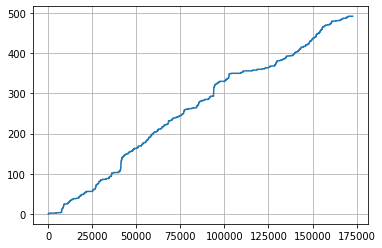

In [31]:
# Verificando a evolução no tempo das transações
plt.plot(df['Time'],df['isFraud'].cumsum())
plt.grid()

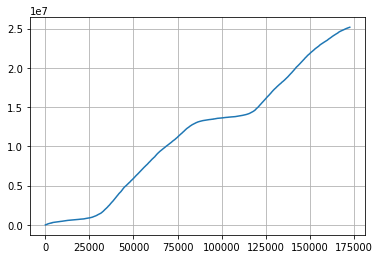

In [32]:
# Verificando a evolução no tempo do montante das transações
plt.plot(df['Time'],df['Amount'].cumsum())
plt.grid()

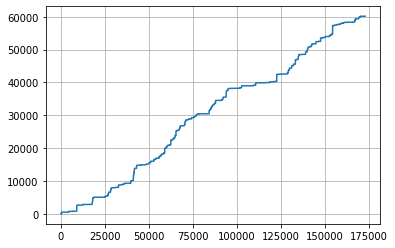

In [33]:
# Verificando a evolução no tempo do montante das transações fraudulentas
plt.plot(df['Time'],(df['Amount']*df['isFraud']).cumsum())
plt.grid()

In [35]:
print(' '.join(['Total de transações fraudulentas',str(df.isFraud.sum())]))
print(' '.join(['Total do montante de transações fraudulentas',str((df.Amount*df.isFraud).sum())]))

Total de transações fraudulentas 492
Total do montante de transações fraudulentas 60127.97


In [36]:
# Verificando a versão do TensorFlow
tf.__version__

'2.0.0'

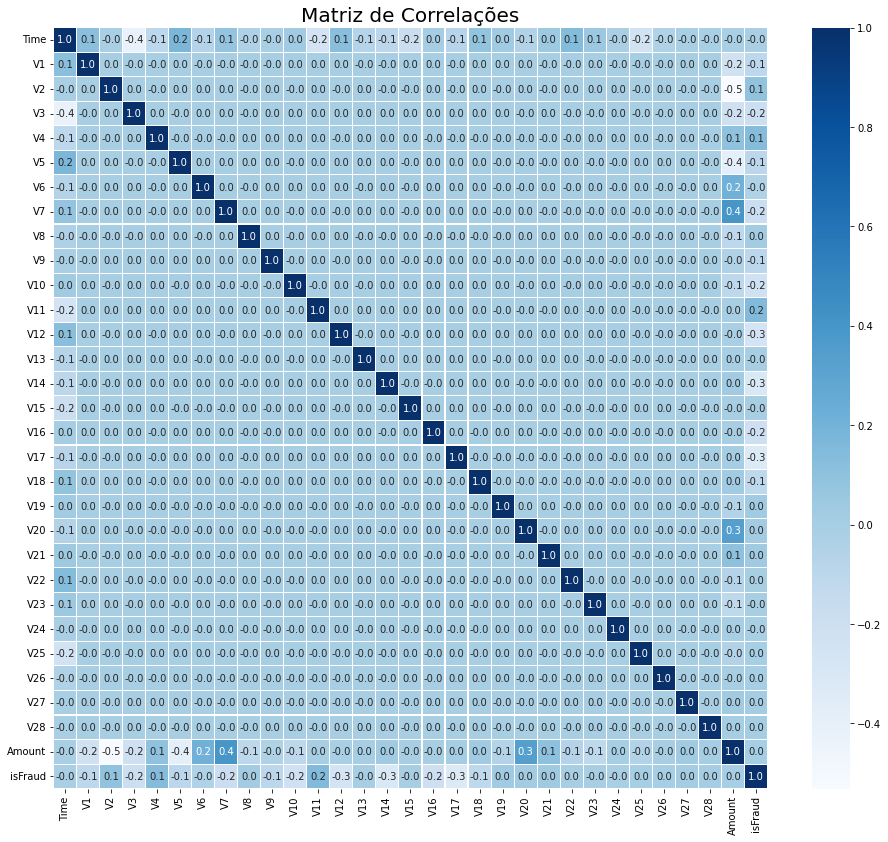

In [38]:
#Matriz de Correlações
plt.figure(figsize = (16,14))
plt.title('Matriz de Correlações', size = 20)
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues",fmt='.1f',annot=True)
plt.show()

In [40]:
# Criando a Matriz de Atributos e Vetor de Alvos y
y = df["isFraud"]
X = df.drop(["isFraud"], axis = 1)

In [41]:
# Verificando o conteudo do dataframe X
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [43]:
#Padronização dos Dados
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [45]:
# Separando os dados de treinamento e teste com Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 0)

In [ ]:
SMOTE().

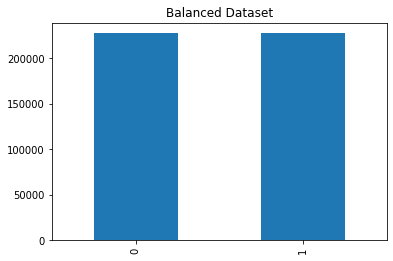

In [48]:
# SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
#SMOTE plot
pd.Series(y_train_SMOTE).value_counts().plot(kind="bar")
plt.title("Balanced Dataset")
plt.show()  

In [52]:
# DNN

model = tf.keras.models.Sequential() # Criando a Camada de Entrada
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape = (30,))) # Criando a Primeira camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Criando a Segunda camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Criando a Terceira camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Criando a Quarta camada Oculta
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Criando a Camada de Saída

In [ ]:
# Verificando a matriz de teste
X_test.shape

(199364,)

### Adição de mais camadas

Estamos definindo quatro camadas ocultas

## Camadas de dropout [Srivastava et al, 2014](https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)

O artigo citado mensciona o seguinte sob o dropout:

Redes neurais profundas com um grande número de parâmetros são sistemas de aprendizado de máquina muito poderosos. No entanto, overfitting é um problema sério em tais redes. Redes grandes também são lentas de usar, tornando difícil lidar com overfitting combinando as previsões de muitas redes neurais grandes diferentes no momento do teste. Dropout é uma técnica para resolver este problema. A ideia principal é descartar unidades aleatoriamente (junto com suas conexões) da rede neural durante o treinamento. Isso evita que as unidades se adaptem demais. Durante o treinamento, amostras de dropout de um número exponencial de diferentes redes “refinadas”. No momento do teste, é fácil aproximar o efeito da média das previsões de todas essas redes reduzidas simplesmente usando uma única rede não otimizada com pesos menores. Isso reduz significativamente o overfitting e oferece grandes melhorias em relação a outros métodos de regularização. Mostramos que o dropout melhora o desempenho de redes neurais em tarefas de aprendizado supervisionado em visão, reconhecimento de fala, classificação de documentos e biologia computacional, obtendo resultados de última geração em muitos conjuntos de dados de referência.



In [ ]:
model = tf.keras.models.Sequential() # Criando a Camada de Entrada
model.add(tf.keras.layers.Dense(units=14, activation='relu', input_shape=(X_train.shape[0], ))) # Criando a Primeira camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=14, activation='relu')) # Criando a Segunda camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=14, activation='relu')) # Criando a Terceira camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=14, activation='relu')) # Criando a Quarta camada Oculta
model.add(tf.keras.layers.Dense(units=2, activation='softmax')) # Criando a Camada de Saída

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [55]:
# Metricas
metrics = [tf.keras.metrics.Accuracy(name="Accuracy"),
           tf.keras.metrics.Precision(name="Precision"),
           tf.keras.metrics.Recall(name="Recall")]

In [81]:
# Compilando e ajustando o modelo

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = metrics)
model_SMOTE_history = (model.fit(X_train_SMOTE, y_train_SMOTE.values, batch_size = 32, epochs = 100))
print("Evaluate on test data")
score = model.evaluate(X_test, y_test.values)
print("test loss, test accuracy, test precision, test recall:", score)

Train on 454908 samples
Epoch 1/100
454908/454908 [==============================] - 48s 106us/sample - loss: 0.0046 - Accuracy: 0.6701 - Precision: 0.9993 - Recall: 0.9998
Epoch 2/100
454908/454908 [==============================] - 47s 104us/sample - loss: 0.0030 - Accuracy: 0.6514 - Precision: 0.9994 - Recall: 0.9998
Epoch 3/100
454908/454908 [==============================] - 47s 104us/sample - loss: 0.0025 - Accuracy: 0.6169 - Precision: 0.9995 - Recall: 0.9999
Epoch 4/100
454908/454908 [==============================] - 48s 105us/sample - loss: 0.0026 - Accuracy: 0.6684 - Precision: 0.9995 - Recall: 0.9999
Epoch 5/100
454908/454908 [==============================] - 47s 104us/sample - loss: 0.0038 - Accuracy: 0.6680 - Precision: 0.9995 - Recall: 0.9998
Epoch 6/100
454908/454908 [==============================] - 47s 104us/sample - loss: 0.0023 - Accuracy: 0.6959 - Precision: 0.9995 - Recall: 0.9998
Epoch 7/100
454908/454908 [==============================] - 49s 109us/sample - lo

In [82]:
# Compilando e ajustando o modelo

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = metrics)
model_history = (model.fit(X_train, y_train.values, batch_size = 32, epochs = 100))
print("Evaluate on test data")
score = model.evaluate(X_test, y_test.values)
print("test loss, test accuracy, test precision, test recall:", score)

Train on 227845 samples
Epoch 1/100
227845/227845 [==============================] - 24s 107us/sample - loss: 0.0034 - Accuracy: 0.9978 - Precision: 0.8086 - Recall: 0.9616
Epoch 2/100
227845/227845 [==============================] - 24s 104us/sample - loss: 0.0030 - Accuracy: 0.9977 - Precision: 0.8184 - Recall: 0.9335
Epoch 3/100
227845/227845 [==============================] - 24s 105us/sample - loss: 0.0022 - Accuracy: 0.9973 - Precision: 0.8148 - Recall: 0.9565
Epoch 4/100
227845/227845 [==============================] - 24s 104us/sample - loss: 0.0015 - Accuracy: 0.9976 - Precision: 0.8491 - Recall: 0.9642
Epoch 5/100
227845/227845 [==============================] - 24s 103us/sample - loss: 0.0051 - Accuracy: 0.9973 - Precision: 0.8326 - Recall: 0.9668
Epoch 6/100
227845/227845 [==============================] - 24s 103us/sample - loss: 0.0051 - Accuracy: 0.9975 - Precision: 0.8631 - Recall: 0.9514
Epoch 7/100
227845/227845 [==============================] - 24s 104us/sample - lo

## Salvando o modelo

In [64]:
model_json = model.to_json()
with open("cc_model_1.json", "w") as json_file:
    json_file.write(model_json)

### Salvando os pesos

In [65]:
model.save_weights("cc_model.h5")